**`Introduction`:** The data set that we are using is a collection of accelerometer data taken from a smartphone that various people carried with them while conducting six different exercises (Downstairs, Jogging, Sitting, Standing, Upstairs, Walking). For each exercise the acceleration for the x, y, and z axis was measured and captured with a timestamp and person ID.

**`Problem Statement`** With this available data, we would like to train a neural network in order to understand if a person carrying a smartphone is performing any of the six activities. Once the neural network has been trained on the existing data, it should be able to correctly predict the type of activity a person is conducting when given previously unseen data.

**`Solution`** The solution to this problem is a deep neural network. Based on the available data it will learn how to differentiate between each of the six activities. We can then show new data to the neural network and it will tell us what the user is doing at any particular point in time. 

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.2.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load the Dataset

In [3]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving WISDM_ar_v1.1_raw.txt to WISDM_ar_v1.1_raw (3).txt


In [0]:
# pd.read_csv("WISDM_ar_v1.1_raw.txt")

In [5]:
file = open("WISDM_ar_v1.1_raw.txt")
lines = file.readlines()
print(lines[0:5])

processedList = []
for i, line in enumerate(lines):
    try:
        line = line.split(",")
        last = line[5].split(";")[0] # split at 6th column and remove ; and then read the first value
        last = last.strip() # remove if there is any white spaces
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print("Error at line number: ", i)

['33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286\n', '33,Jogging,49106062271000,5.012288,11.264028,0.95342433\n', '33,Jogging,49106112167000,4.903325,10.882658,-0.08172209\n', '33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172\n', '33,Jogging,49106332290000,-1.1849703,12.108489,7.205164\n']
Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [6]:
print(processedList[0:5])

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'], ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'], ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'], ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'], ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164']]


In [7]:
## 
cols = ['user', 'activity', 'time', 'x', 'y', 'z']

data = pd.DataFrame(data = processedList, columns = cols)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [8]:
## Shape of data
data.shape

(343416, 6)

In [9]:
## Infromation or type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [10]:
## Converting x, y and x to float type -- Numeric
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

# check information again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [11]:
## check for null or NaN
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [12]:
## Data distribution
data['activity'].value_counts(dropna = False)

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

###
- Dataset is imbalance since walking and jogging are contributing the most. Therefore it need to be balanced.

In [0]:
### Balance the dataset


Text(0.5, 1.0, 'Training Examples by Activity Type')

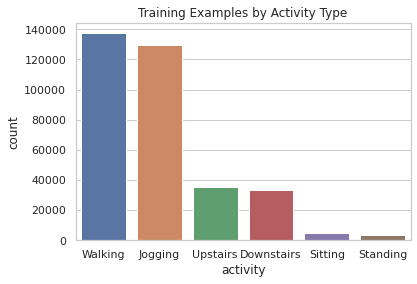

In [14]:

## Plot
# Show how many training examples exist for each of the six activities
plt.figure(figsize=(6,4))
sns.set(style="whitegrid")
ax = sns.countplot(x="activity", data = data, \
                   order = data['activity'].value_counts().index)
plt.title('Training Examples by Activity Type')

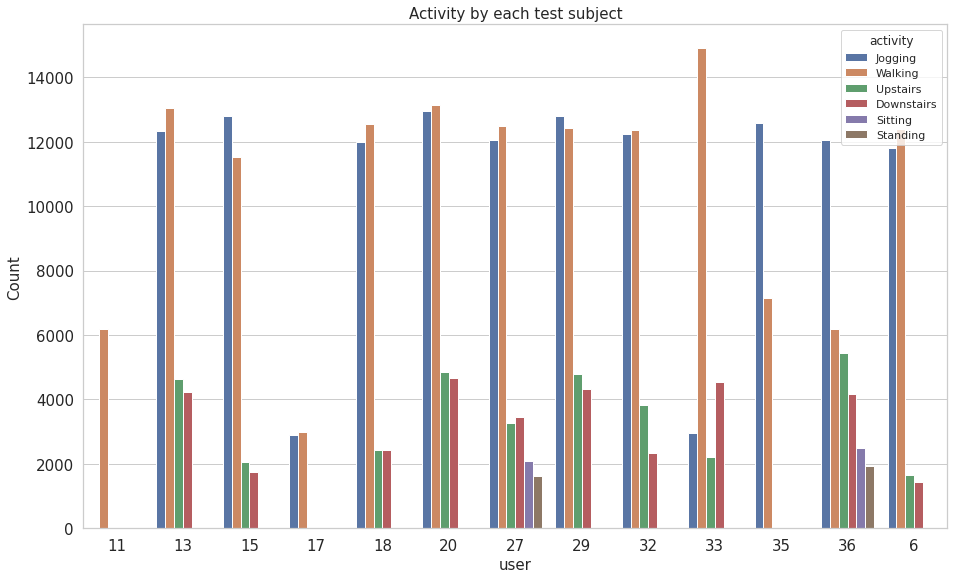

In [15]:

# Better understand how the recordings are spread across the different
# users who participated in the study
fig = plt.figure(figsize = (12, 7))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = "user", hue = "activity", data = data)
plt.xlabel("user", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

- Let’s take a look at the accelerometer data for each of the three axis for all six possible activities. The data is recorded at a sampling rate of 20 Hz (20 values per second). Since we show the first 180 records, each chart shows a 10 second interval for each of the six activities (calculation: 0.05 * 200 = 10 seconds).

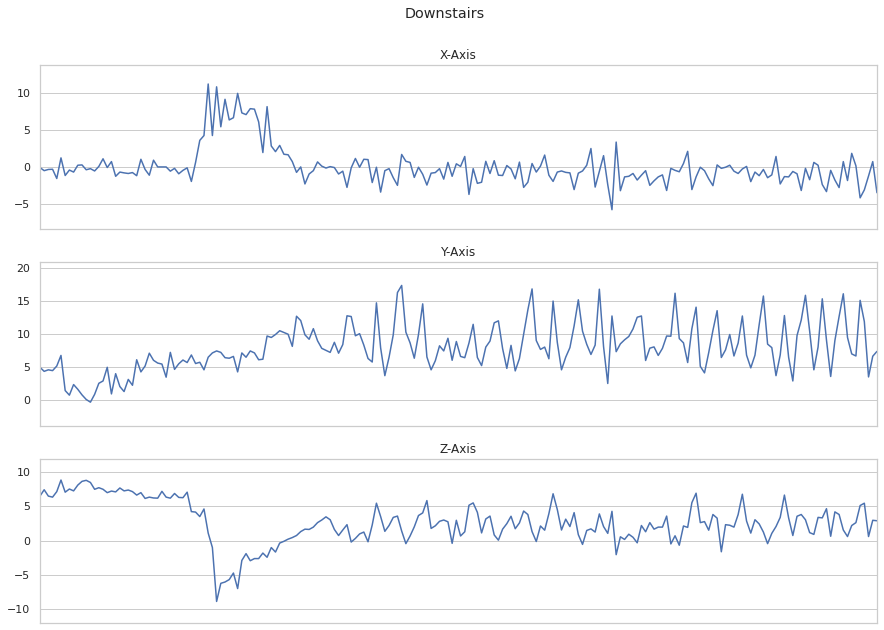

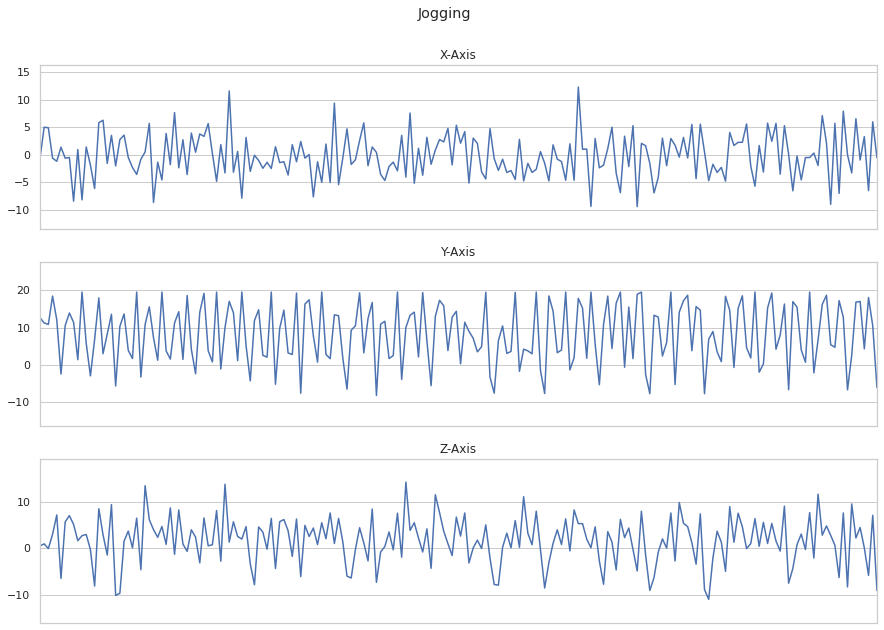

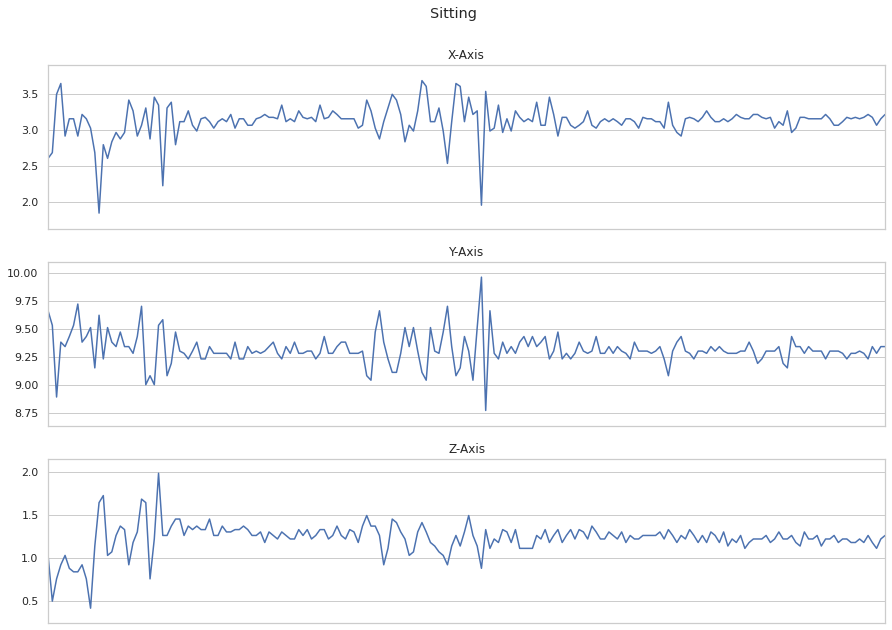

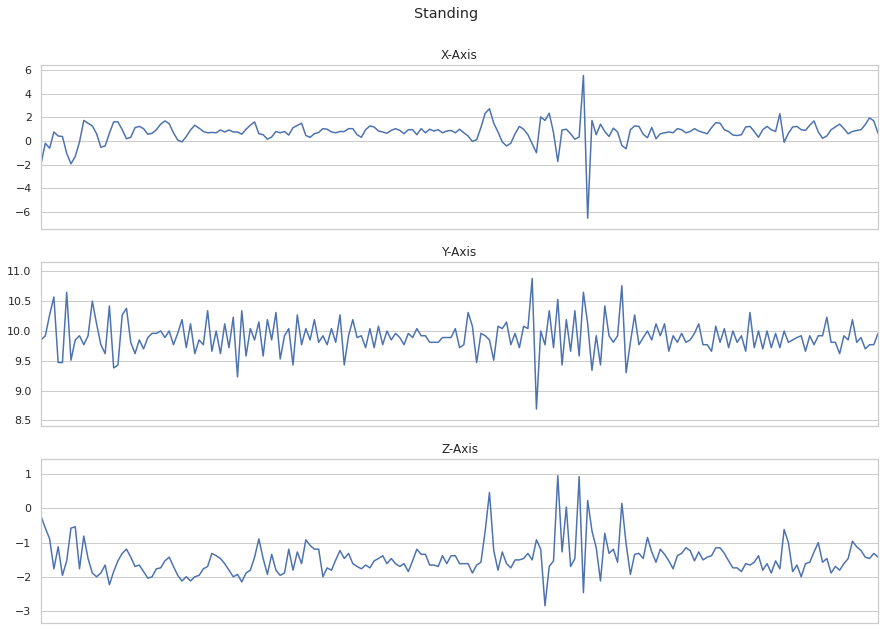

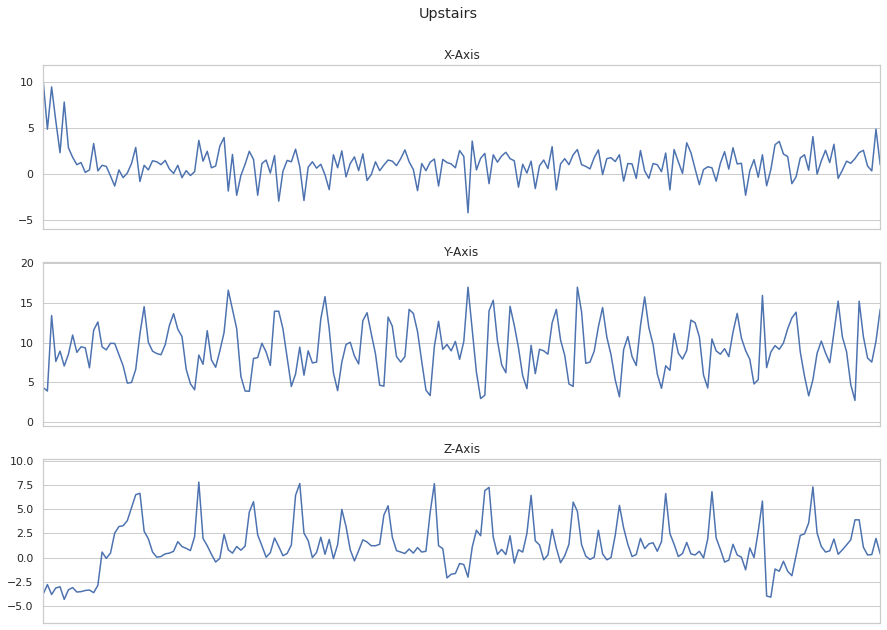

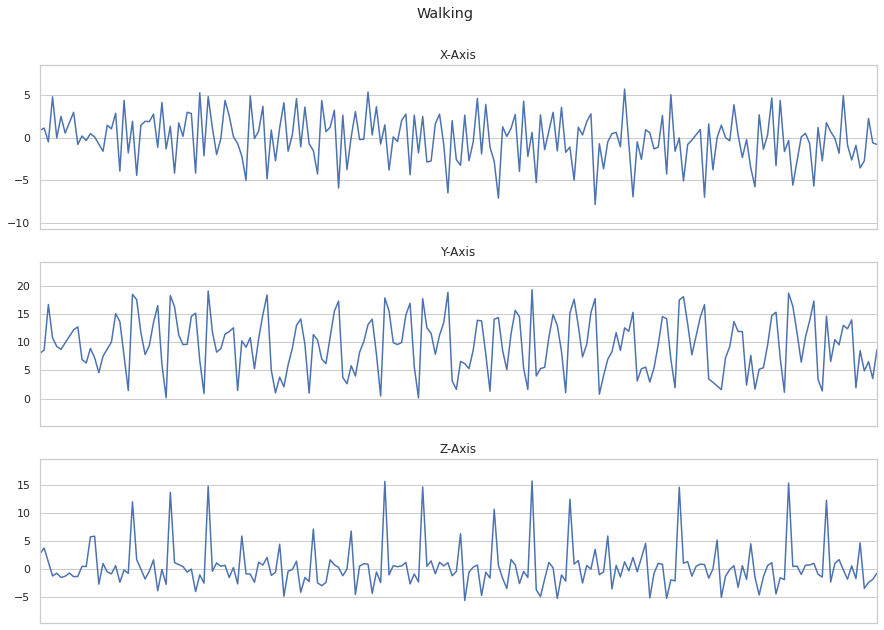

In [16]:
### 
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'b')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in np.unique(data['activity']):
    subset = data[data['activity'] == activity][:200]
    plot_activity(activity, subset)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


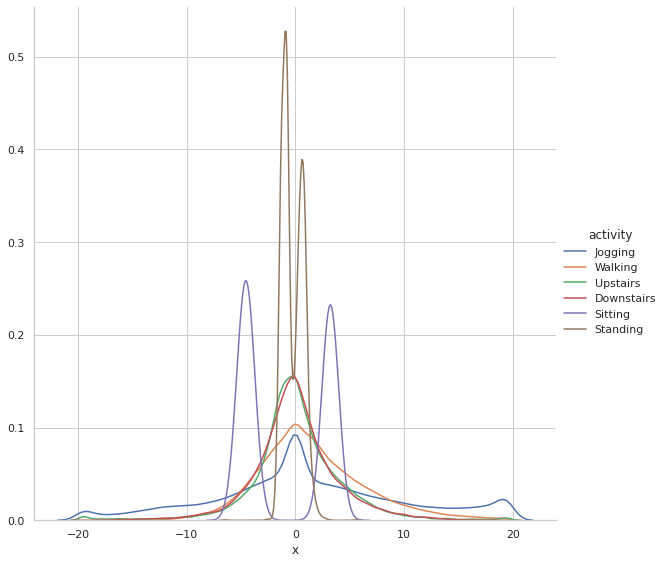

In [17]:
facetgrid = sns.FacetGrid(data = data, hue = "activity", size = 8)
facetgrid.map(sns.distplot, "x" ,hist = False).add_legend()
plt.show()

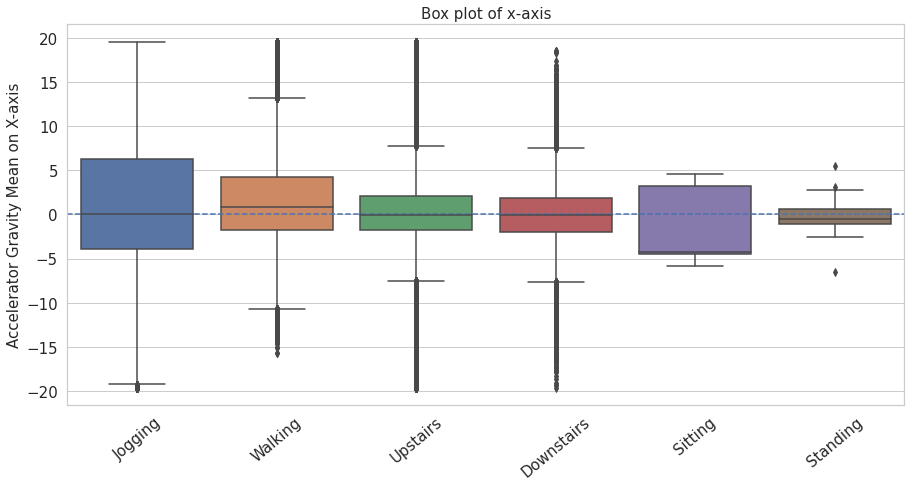

In [18]:
## Accelerator Gravity Mean on X-axis can be quite important
plt.figure(figsize = (15, 7))
sns.boxplot(x = "activity", y = "x", showfliers = True, data = data)
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of x-axis", fontsize = 15)
plt.ylabel("Accelerator Gravity Mean on X-axis", fontsize = 15)
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

In [19]:
## drop "user", "time"
df = data.drop(["user", "time"], axis = 1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [20]:
df['activity'].value_counts(dropna = False)

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [0]:
## Balancing dataset
Walking = df[df["activity"] == "Walking"].copy()
Jogging = df[df["activity"] == "Jogging"].copy()
Upstairs = df[df["activity"] == "Upstairs"].copy()
Downstairs = df[df["activity"] == "Downstairs"].copy()
Sitting = df[df["activity"] == "Sitting"].copy()
Standing = df[df["activity"] == "Standing"].copy()

In [147]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(343416, 4)

In [148]:
balanced_data['activity'].value_counts(dropna = False)

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [149]:
## Encode the "activity" column
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [150]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [151]:
## Seprate dependent variable and independent variables
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']
X.shape, y.shape

((343416, 3), (343416,))

In [152]:
## ## Scale 'x', 'y' and 'z'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,-0.024740,-0.008182,0.558048,5
1,0.016583,0.084342,0.781233,5
2,-0.229288,1.297438,0.224801,5
3,0.574443,0.407149,-0.334689,5
4,-0.159039,0.176866,-0.224625,5
...,...,...,...,...
343411,-0.290884,0.206364,0.499959,3
343412,-0.331842,0.218441,0.490787,3
343413,-0.380384,0.221460,0.499959,3
343414,-0.466851,0.106732,0.420469,3


### Frame Preparation

In [0]:
import scipy.stats as stats

In [0]:
Fs = 20
frame_size = Fs*4 # 4 seconds --- 80 samples X x, y, z = 240
hop_size = Fs*2 # 40 samples -- step size

In [0]:
### 

def get_frames(df, frame_size, hop_size):
    
    N_FEATURES = 3
    frames = []
   
    labels = []
    for i in range(0, len(df) - frame_size, hop_size): # [0 40 80 ... len(df) - 80]
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]

        ## Retrieve the most often used label in this segement
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        
        frames.append([x, y, z])
        labels.append(label)
    
    ## Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels


In [227]:
X, y = get_frames(scaled_X, frame_size, hop_size)
# print(len(X[0:1]))
# print(X[0:1])
X.shape, y.shape


((8584, 80, 3), (8584,))

In [157]:
## Example
array = [[1, 2, 3], [7, 8, 9], [54, 78, 91], [85, 71, 80], [1, 2, 3], [7, 8, 9], [54, 78, 91], [85, 71, 80]]
# new_array = np.asarray(array)
new_array = np.asarray(array).reshape(-1, 2, 3)
print(new_array)
print(new_array.shape)

[[[ 1  2  3]
  [ 7  8  9]]

 [[54 78 91]
  [85 71 80]]

 [[ 1  2  3]
  [ 7  8  9]]

 [[54 78 91]
  [85 71 80]]]
(4, 2, 3)


In [230]:
## Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
x_train.shape, x_test.shape

((6867, 80, 3), (1717, 80, 3))

In [231]:
x_train[0].shape, x_test[0].shape

((80, 3), (80, 3))

In [0]:
## Reshapping train and test data
x_train = x_train.reshape(6867, 80, 3, 1)
x_test = x_test.reshape(1717, 80, 3, 1)

In [233]:
x_train[0].shape

(80, 3, 1)

In [234]:
## 2D CNN Model

model = Sequential()
## #16 filters --- ## (2,2) kernel size
model.add(Conv2D(16, (2,2), activation='relu', input_shape = x_train[0].shape))
## 0.1 --- 10% of neurons
model.add(Dropout(0.1))


model.add(Conv2D(32, (2,2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 79, 2, 16)         80        
_________________________________________________________________
dropout_21 (Dropout)         (None, 79, 2, 16)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 78, 1, 32)         2080      
_________________________________________________________________
dropout_22 (Dropout)         (None, 78, 1, 32)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2496)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                159808    
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)              

In [0]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [236]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/10
215/215 [==============================] - 2s 10ms/step - loss: 0.7543 - accuracy: 0.7321 - val_loss: 0.5107 - val_accuracy: 0.8183
Epoch 2/10
215/215 [==============================] - 2s 9ms/step - loss: 0.5002 - accuracy: 0.8161 - val_loss: 0.4301 - val_accuracy: 0.8468
Epoch 3/10
215/215 [==============================] - 2s 9ms/step - loss: 0.4155 - accuracy: 0.8423 - val_loss: 0.3489 - val_accuracy: 0.8742
Epoch 4/10
215/215 [==============================] - 2s 9ms/step - loss: 0.3474 - accuracy: 0.8676 - val_loss: 0.2954 - val_accuracy: 0.9010
Epoch 5/10
215/215 [==============================] - 2s 9ms/step - loss: 0.3038 - accuracy: 0.8879 - val_loss: 0.2647 - val_accuracy: 0.9091
Epoch 6/10
215/215 [==============================] - 2s 10ms/step - loss: 0.2707 - accuracy: 0.8978 - val_loss: 0.2377 - val_accuracy: 0.9115
Epoch 7/10
215/215 [==============================] - 2s 9ms/step - loss: 0.2388 - accuracy: 0.9104 - val_loss: 0.2173 - val_accuracy: 0.9365
Epoc

In [0]:
#### Plot

def plot_learningCurve(history, epochs):
    # plot training & validation accuracy values
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()

     # plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper right')
    plt.show()

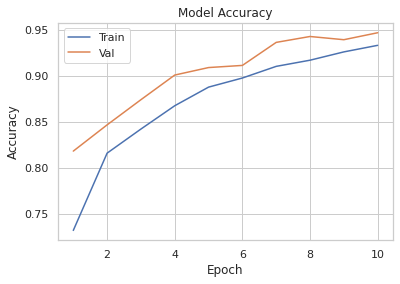

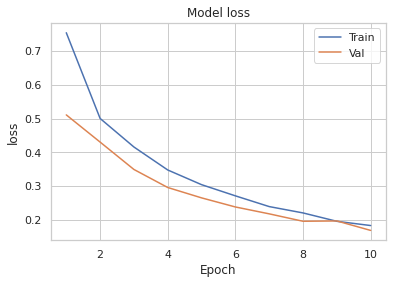

In [238]:
plot_learningCurve(history, 10)

### Confusion Matrix

In [0]:
### Confusion Matrix
# !pip install mlxtend


from sklearn.metrics import confusion_matrix

In [0]:
y_pred = model.predict_classes(x_test)

In [241]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[138   4   0   0  18   7]
 [  4 632   0   0   5   6]
 [  0   0  23   0   0   0]
 [  0   0   0  17   0   0]
 [ 15  10   0   0 141  10]
 [  5   0   0   0   7 675]]


In [0]:
## Plot Function
import numpy as np


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


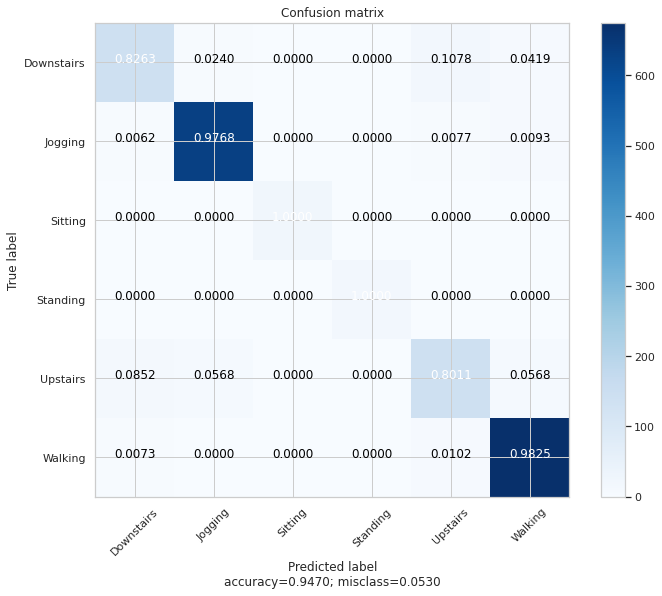

In [243]:
plot_confusion_matrix(cm = mat, target_names = label.classes_, title='Confusion matrix', cmap=None, normalize=True)

In [244]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.98      0.98      0.98       647
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        17
           4       0.82      0.80      0.81       176
           5       0.97      0.98      0.97       687

    accuracy                           0.95      1717
   macro avg       0.94      0.93      0.93      1717
weighted avg       0.95      0.95      0.95      1717

